# Welcome to Jupyter!

This repo contains an introduction to [Jupyter](https://jupyter.org) and [IPython](https://ipython.org).

Outline of some basics:

* [Notebook Basics](../examples/Notebook/Notebook%20Basics.ipynb)
* [IPython - beyond plain python](../examples/IPython%20Kernel/Beyond%20Plain%20Python.ipynb)
* [Markdown Cells](../examples/Notebook/Working%20With%20Markdown%20Cells.ipynb)
* [Rich Display System](../examples/IPython%20Kernel/Rich%20Output.ipynb)
* [Custom Display logic](../examples/IPython%20Kernel/Custom%20Display%20Logic.ipynb)
* [Running a Secure Public Notebook Server](../examples/Notebook/Running%20the%20Notebook%20Server.ipynb#Securing-the-notebook-server)
* [How Jupyter works](../examples/Notebook/Multiple%20Languages%2C%20Frontends.ipynb) to run code in different languages.

You can also get this tutorial and run it on your laptop:

    git clone https://github.com/ipython/ipython-in-depth

Install IPython and Jupyter:

with [conda](https://www.anaconda.com/download):

    conda install ipython jupyter

with pip:

    # first, always upgrade pip!
    pip install --upgrade pip
    pip install --upgrade ipython jupyter

Start the notebook in the tutorial directory:

    cd ipython-in-depth
    jupyter notebook

In [1]:
import pandas as pd
import numpy as np

In [2]:
dataset = pd.read_csv("forestfires.csv")
dataset.head()

,coord_X,coord_Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [3]:
dataset.tail()


,coord_X,coord_Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
512,4,3,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44
513,2,4,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29
514,7,4,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16
515,1,4,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00
516,6,3,nov,tue,79.5,3.0,106.7,1.1,11.8,31,4.5,0.0,0.00


In [4]:
dataset.nlargest(3, 'area',keep='first')

,coord_X,coord_Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
238,6,5,sep,sat,92.5,121.1,674.4,8.6,25.1,27,4.0,0.0,1090.84
415,8,6,aug,thu,94.8,222.4,698.6,13.9,27.5,27,4.9,0.0,746.28
479,7,4,jul,mon,89.2,103.9,431.6,6.4,22.6,57,4.9,0.0,278.53


In [5]:
dataset.nsmallest(3,'area',keep='last')

,coord_X,coord_Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
516,6,3,nov,tue,79.5,3.0,106.7,1.1,11.8,31,4.5,0.0,0.0
515,1,4,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.0
511,8,6,aug,sun,81.6,56.7,665.6,1.9,27.8,35,2.7,0.0,0.0


<AxesSubplot:xlabel='area', ylabel='area'>

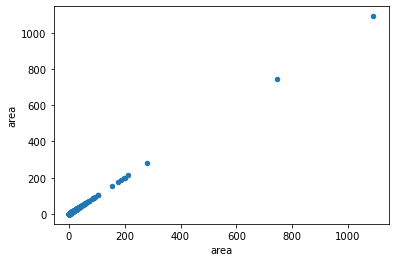

In [6]:
dataset.plot.scatter(x='area',y='area')

In [7]:
corrMatrix = dataset.corr()
print(corrMatrix)

          coord_X   coord_Y      FFMC       DMC        DC       ISI      temp  \
coord_X  1.000000  0.539548 -0.050014 -0.048384 -0.085916  0.006210 -0.052299   
coord_Y  0.539548  1.000000 -0.093677  0.007782 -0.101178 -0.024488 -0.023613   
FFMC    -0.050014 -0.093677  1.000000  0.056102  0.065324  0.086470  0.062837   
DMC     -0.048384  0.007782  0.056102  1.000000  0.682192  0.305128  0.469095   
DC      -0.085916 -0.101178  0.065324  0.682192  1.000000  0.229154  0.496167   
ISI      0.006210 -0.024488  0.086470  0.305128  0.229154  1.000000  0.393683   
temp    -0.052299 -0.023613  0.062837  0.469095  0.496167  0.393683  1.000000   
RH       0.085223  0.062221 -0.048512  0.073795 -0.039192 -0.132517 -0.529388   
wind     0.018798 -0.020341 -0.012160 -0.105342 -0.203466  0.106826 -0.226362   
rain     0.065387  0.033234  0.005575  0.074790  0.035861  0.067668  0.069429   
area     0.063385  0.044873 -0.000806  0.072994  0.049383  0.008258  0.098703   

               RH      wind

In [8]:
rs = np.random.RandomState(0)
corr = dataset.corr()
corr.style.background_gradient(cmap='coolwarm')

,coord_X,coord_Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
coord_X,1.000000,0.539548,-0.050014,-0.048384,-0.085916,0.006210,-0.052299,0.085223,0.018798,0.065387,0.063385
coord_Y,0.539548,1.000000,-0.093677,0.007782,-0.101178,-0.024488,-0.023613,0.062221,-0.020341,0.033234,0.044873
FFMC,-0.050014,-0.093677,1.000000,0.056102,0.065324,0.086470,0.062837,-0.048512,-0.012160,0.005575,-0.000806
DMC,-0.048384,0.007782,0.056102,1.000000,0.682192,0.305128,0.469095,0.073795,-0.105342,0.074790,0.072994
DC,-0.085916,-0.101178,0.065324,0.682192,1.000000,0.229154,0.496167,-0.039192,-0.203466,0.035861,0.049383
ISI,0.006210,-0.024488,0.086470,0.305128,0.229154,1.000000,0.393683,-0.132517,0.106826,0.067668,0.008258
temp,-0.052299,-0.023613,0.062837,0.469095,0.496167,0.393683,1.000000,-0.529388,-0.226362,0.069429,0.098703
RH,0.085223,0.062221,-0.048512,0.073795,-0.039192,-0.132517,-0.529388,1.000000,0.069410,0.099751,-0.075519
wind,0.018798,-0.020341,-0.012160,-0.105342,-0.203466,0.106826,-0.226362,0.069410,1.000000,0.061119,0.012317
rain,0.065387,0.033234,0.005575,0.074790,0.035861,0.067668,0.069429,0.099751,0.061119,1.000000,-0.007366


In [9]:
training_data = dataset.sample(frac=0.8, random_state=25)
testing_data = dataset.drop(training_data.index)

<AxesSubplot:xlabel='FFMC', ylabel='temp'>

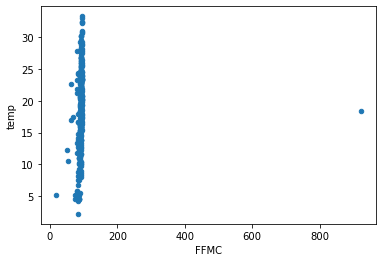

In [10]:
training_data.plot.scatter(x='FFMC',y='temp')

<AxesSubplot:xlabel='FFMC', ylabel='temp'>

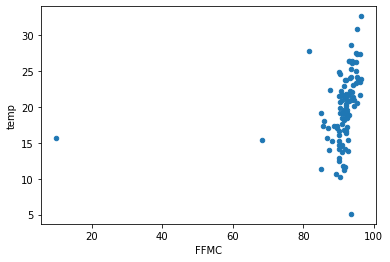

In [11]:
testing_data.plot.scatter(x='FFMC',y='temp')